=======================================================================================

# TP de Tests Statistiques - Etude d'un objet connecté

=======================================================================================


Dans ce TP, nous allons considérer que vous êtes un(e) statisticien(ne) chargé(e) de récupérer des résultats 
de différents tests de mesure d'un objet placé devant un utilisateur, au moyen d'un téléphone portable. 

On prend une photo à une position (x,y,z) et un algorithme embarqué fournit la mesure 

Cette mesure correspond à un volume reconstitué, et l'objet en question est un disque qui 
peut présenter deux volumes différents (O et X)

Les mesures sont faites par différents observateurs, de façon répétée, et pour différentes luminosités.

L'objectif de l'étude est de préparer la qualification du dispositif de mesure. 
Pour cela, on veut caractériser les conditions d'utilisation en répondant aux questions suivantes :

- La mesure dépend-t-elle de la luminosité ?
- Y-a-til un effet opérateur ?
- Le bruit de mesure dépend-t-elle du volume ?

Avant cela, il faut pouvoir travailler avec des échantillons de valeurs indépendantes et de même loi statistique.
On va devoir établir une stratégie de tests statistiques où l'on teste successivement : 

- l'indépendance approximative des données dans un sous-échantillon (test de non corrélation)
- le fait que ces données suivent une même loi (stationnarité)
- l'appariement des données

Et on devra aussi regarder la forme des distributions (histogrammes, etc.)

A vous de jouer ! 

In [1]:
# Téléchargez le jeu de données "mesures_objet_connecte.csv" et placez-le dans le dataframe "data"

%matplotlib notebook
from download import download
import pandas as pd
import numpy as np
from scipy import stats
#url = "http://www.lpsm.paris/pageperso/bousquet/yotta/data/age_students.csv"
path_target = "./mesures_objet_connecte.csv"
#download(url, path_target, replace=True)
data = pd.read_csv(path_target,sep=';')

In [2]:
# Produire un résumé global des données
#print(data.info())
#print(data.describe())
data

operateur luminosite objet  num_mesure       volume          x          y  \
0           A          E     O           1  2009.861206   8.045916   8.230902   
1           A          E     O          10  1984.620972   7.920296   8.134527   
2           A          E     O          11  1948.836182   7.852463   8.370901   
3           A          E     O          12  1982.928345   7.910089   8.412540   
4           A          E     O          13  2011.469971   7.811394   8.246794   
..        ...        ...   ...         ...          ...        ...        ...   
535         K          F     X           5  1878.866211   7.913452   8.373283   
536         K          F     X           6  1888.743408   7.817247   8.201166   
537         K          F     X           7  1898.099243  10.652651  12.805893   
538         K          F     X           8  1871.720337   7.622419   7.919395   
539         K          F     X           9  1876.848389   7.908579   8.150099   

             z  
0    46.482643  
1    46.263283  
2    45.932064  
3    46.292049  
4    46.496132  
..         ...  
535  46.094746  
536  46.189400  
537  45.776592  
538  45.994129  
539  46.155510  

[540 rows x 8 columns]

In [3]:
# Listons les valeurs des variables catégorielles
print("Valeur de OPERATEUR = "+str(np.unique(data["operateur"])))
print("Valeur de LUMINOSITE = "+str(np.unique(data["luminosite"])))
print("Valeur de OBJET = "+str(np.unique(data["objet"])))

Valeur de OPERATEUR = ['A' 'K' 'M']
Valeur de LUMINOSITE = ['E' 'F' 'N']
Valeur de OBJET = ['O' 'X']


In [4]:
# On a donc 3 x 3 x 2 = 18 sous-jeux de données différents, consistant en la répétition d'une même expérience


In [5]:
# Voici aussi une définition basique des sous-dataframes correspondantes

data_A_E_O = data[(data['operateur']=="A")&(data['luminosite']=="E")&(data['objet']=="O")]
data_K_E_O = data[(data['operateur']=="K")&(data['luminosite']=="E")&(data['objet']=="O")]
data_M_E_O = data[(data['operateur']=="M")&(data['luminosite']=="E")&(data['objet']=="O")]
data_A_F_O = data[(data['operateur']=="A")&(data['luminosite']=="F")&(data['objet']=="O")]
data_K_F_O = data[(data['operateur']=="K")&(data['luminosite']=="F")&(data['objet']=="O")]
data_M_F_O = data[(data['operateur']=="M")&(data['luminosite']=="F")&(data['objet']=="O")]
data_A_N_O = data[(data['operateur']=="A")&(data['luminosite']=="N")&(data['objet']=="O")]
data_K_N_O = data[(data['operateur']=="K")&(data['luminosite']=="N")&(data['objet']=="O")]
data_M_N_O = data[(data['operateur']=="M")&(data['luminosite']=="N")&(data['objet']=="O")]
data_A_E_X = data[(data['operateur']=="A")&(data['luminosite']=="E")&(data['objet']=="X")]
data_K_E_X = data[(data['operateur']=="K")&(data['luminosite']=="E")&(data['objet']=="X")]
data_M_E_X = data[(data['operateur']=="M")&(data['luminosite']=="E")&(data['objet']=="X")]
data_A_F_X = data[(data['operateur']=="A")&(data['luminosite']=="F")&(data['objet']=="X")]
data_K_F_X = data[(data['operateur']=="K")&(data['luminosite']=="F")&(data['objet']=="X")]
data_M_F_X = data[(data['operateur']=="M")&(data['luminosite']=="F")&(data['objet']=="X")]
data_A_N_X = data[(data['operateur']=="A")&(data['luminosite']=="N")&(data['objet']=="X")]
data_K_N_X = data[(data['operateur']=="K")&(data['luminosite']=="N")&(data['objet']=="X")]
data_M_N_X = data[(data['operateur']=="M")&(data['luminosite']=="N")&(data['objet']=="x")]

In [6]:
# Représentation des distributions de volume par échantillon
# on ajoute une variable de classe 

In [7]:
# On ajoute une colonne qualitative "jeu" valant "op_lum_ob" à "data" indiquant
# le nom du sous-jeu de données

data['jeu'] =  data["operateur"]+"_"+data["luminosite"]+"_"+data["objet"]
data


operateur luminosite objet  num_mesure       volume          x          y  \
0           A          E     O           1  2009.861206   8.045916   8.230902   
1           A          E     O          10  1984.620972   7.920296   8.134527   
2           A          E     O          11  1948.836182   7.852463   8.370901   
3           A          E     O          12  1982.928345   7.910089   8.412540   
4           A          E     O          13  2011.469971   7.811394   8.246794   
..        ...        ...   ...         ...          ...        ...        ...   
535         K          F     X           5  1878.866211   7.913452   8.373283   
536         K          F     X           6  1888.743408   7.817247   8.201166   
537         K          F     X           7  1898.099243  10.652651  12.805893   
538         K          F     X           8  1871.720337   7.622419   7.919395   
539         K          F     X           9  1876.848389   7.908579   8.150099   

             z    jeu  
0    46.482643  A_E_O  
1    46.263283  A_E_O  
2    45.932064  A_E_O  
3    46.292049  A_E_O  
4    46.496132  A_E_O  
..         ...    ...  
535  46.094746  K_F_X  
536  46.189400  K_F_X  
537  45.776592  K_F_X  
538  45.994129  K_F_X  
539  46.155510  K_F_X  

[540 rows x 9 columns]

In [8]:
# Fonction produisant un test global de stationnarité d'un échantillon :
# Les données suivent-elles peu ou prou la même loi ?

# Notons qu'on souhaiterait pouvoir rejeter la non-stationnarité
# au profit de la stationnarité ; on choisit donc l'hypothèse nulle H0
# comme la non-stationnarité, et on mène des tests ADF et PP (voir slides)

from statsmodels.tsa.stattools import adfuller
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron

def test_stationnarite(X):
    print("On rejette la stationnarité si les p-value des tests sont très faibles")
    # Extraction des données de volume
    Y = X["volume"]
    # Test ADF version 1 (package StatTools)
    print("\n\n","TEST ADF v1 ----------- ")
    result = adfuller(Y)
    print('Statistique ADF: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Valeurs critiques:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
    # Test ADF version 2 (package unitroot) 
    print("\n","TEST ADF v2 ----------- ")
    adf = ADF(Y)
    print(adf)
        
    # Test PP
    print("\n\n","TEST PP ----------- ")
    result2 = PhillipsPerron(Y)
    print(result2)


In [9]:
# Exemple
test_stationnarite(data_A_E_O)


On rejette la stationnarité si les p-value des tests sont très faibles


 TEST ADF v1 ----------- 
Statistique ADF: -4.256863
p-value: 0.000527
Valeurs critiques:
	1%: -3.679
	5%: -2.968
	10%: -2.623

 TEST ADF v2 ----------- 
   Augmented Dickey-Fuller Results   
Test Statistic                 -4.257
P-value                         0.001
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.68 (1%), -2.97 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


 TEST PP ----------- 
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.195
P-value                         0.001
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.68 (1%), -2.97 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [10]:
# Technique de bootstrap : 
# en ôtant une valeur de l'échantillon initial, produire une distribution de 30 valeurs de p-value, et vérifier que cette
# distribution reste dans des gammes de valeurs faibles (<0.05) <=> robustesse du diagnostic du test initial

In [11]:
# Fonction produisant un test global de décorrélation des éléments d'un échantillon 
# lorsque celui-ci est considéré comme stationnaire
# Les données sont-elles plus ou moins iid ?

# Là encore on aimerait pouvoir rejeter une hypothèse H0 de dépendance, mais les tests dont nous
# disposons font l'inverse : H0 est l'indépendance d'indépendance entre valeurs de l'échantillon

from statsmodels.stats.stattools import durbin_watson
import scipy as sp
import numpy as np
import pymannkendall as mk

def test_independance(X):
    print("On rejette l'indépendance entre éléments de l'échantillon si les p-value des tests sont très faibles")
    # Extraction des données de volume
    Y = X["volume"]
    
    # Test de Mann-Kendall
    print("\n\n","TEST Mann Kendall ----------- ")
    result = mk.original_test(Y)
    print("La p-value du test vaut "+str(result.p))

    # Test Durbin-Watson
    print("\n\n","TEST Durbin-Watson ----------- ")
    print("On ne rejette pas l'hypothèse H0 entre éléments de l'échantillon si la statistique de Durbin-Watson est proche de 0")
    result2 = durbin_watson(Y)
    print("La valeur de la statistique est "+str(result2))

In [12]:
# Exemple
test_independance(data_A_E_O)

On rejette l'indépendance entre éléments de l'échantillon si les p-value des tests sont très faibles


 TEST Mann Kendall ----------- 
La p-value du test vaut 0.41182433473249125


 TEST Durbin-Watson ----------- 
On ne rejette pas l'hypothèse H0 entre éléments de l'échantillon si la statistique de Durbin-Watson est proche de 0
La valeur de la statistique est 0.00016177873654210653


In [13]:
# Fonction testant l'hypothèse H0 : 2 échantillons chacun iid suivent la même distribution

def test_similarite(X,Y):
    # Extraction des données de volume
    V1 = X["volume"]
    V2 = Y["volume"]
    
    result = sp.stats.mannwhitneyu(V1,V2)
    print("La p-value du test de Mann-Withey vaut "+str(result.pvalue))
    
    
    result2 = sp.stats.ks_2samp(V1,V2)
    print("La p-value du test de Kolmogorov-Smirnov vaut "+str(result2.pvalue))
    
    # Si les p-value sont larges, l'hypothèse H0 ne peut pas être rejetée

In [14]:
# Exemple : on teste la luminosité, pour l'opérateur A donné et pour l'objet O donné
print("Jeux A-E-O et A-F-O")
test_similarite(data_A_E_O,data_A_F_O)
print("Jeux A-E-O et A-N-O")
test_similarite(data_A_E_O,data_A_N_O)
print("Jeux A-F-O et A-N-O")
test_similarite(data_A_F_O,data_A_F_O)

Jeux A-E-O et A-F-O
La p-value du test de Mann-Withey vaut 0.11128644823328254
La p-value du test de Kolmogorov-Smirnov vaut 0.5940706297759378
Jeux A-E-O et A-N-O
La p-value du test de Mann-Withey vaut 0.030725955505628493
La p-value du test de Kolmogorov-Smirnov vaut 0.23907300248018645
Jeux A-F-O et A-N-O
La p-value du test de Mann-Withey vaut 0.49704973080841425
La p-value du test de Kolmogorov-Smirnov vaut 1.0


On obtient quasiment toujours des **p-value importantes** (c'est-à-dire qui ne correspondent pas 
à des niveaux de queue extrêmes de la distribution de la statistique de test).

On conclut donc qu'il n'est pas illégitime 
de considérer que H0 est une hypothèse pertinente, donc que les trois sous-échantillons 
peuvent être considérés comme issus de la même loi, et que **l'effet de la luminosité est donc non significatif sur la variation de distribution des données collectées par l'opérateur A mesurant l'objet O**

 On peut d'ailleurs mener les mêmes tests en construisant un jeu A-EF-O qui 
 regroupe A-E-O et A-F-O et vérifier si on retrouve bien un comportement similaire à celui de A-N-O

In [15]:
data_A_EF_O = pd.concat([data_A_E_O,data_A_F_O]) 
test_similarite(data_A_EF_O,data_A_N_O)

La p-value du test de Mann-Withey vaut 0.0834379015217443
La p-value du test de Kolmogorov-Smirnov vaut 0.3871305023281284


In [16]:
# Sinon on peut aussi directement utiliser le test de Kruskal-Wallis qui permet 
# de tester plus de 2 échantillons simultanément (non implémenté dans la fonction précédente)

Reproduisons l'exemple précédent sur les autres opérateurs et pour tous les objets

In [17]:
print("Jeux K-E-O et K-F-O")
test_similarite(data_K_E_O,data_K_F_O)
print("Jeux K-E-O et K-N-O")
test_similarite(data_K_E_O,data_K_N_O)
print("Jeux K-F-O et K-N-O")
test_similarite(data_K_F_O,data_K_F_O)

# Etc.
# D'une manière générale on va arriver à une très faible influence de la luminosité... et 
# par contre un fort effet de l'opérateur et de l'objet

Jeux K-E-O et K-F-O
La p-value du test de Mann-Withey vaut 0.10850841227431085
La p-value du test de Kolmogorov-Smirnov vaut 0.5940706297759378
Jeux K-E-O et K-N-O
La p-value du test de Mann-Withey vaut 0.04249984874348204
La p-value du test de Kolmogorov-Smirnov vaut 0.07088798787114439
Jeux K-F-O et K-N-O
La p-value du test de Mann-Withey vaut 0.49704973080841425
La p-value du test de Kolmogorov-Smirnov vaut 1.0


In [18]:
# Fonction testant la gaussianité d'un échantillon et produisant les estimateurs classiques de la variance
# + histogramme et plot densite 

import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

def test_gaussien(X):
    # Extraction des données de volume
    Y = X["volume"]
    
    # Calcul moyenne et écart-type empiriques
    moy = Y.mean()
    sd  = Y.std()

    # Test d'Anderson-Darling
    print("\n\n","TEST Anderson Darling ----------- ")
    result = sp.stats.anderson(Y,dist='norm')
    print("Valeur de la statistique "+str(result.statistic))
    print("Valeurs critiques "+str(result.critical_values))
    print("Niveaux de significativité "+str(result.significance_level))
    print("\n\n","L'hypothèse nulle est celle de la gaussianité ; si la valeur de la statistique est plus grande que la valeur critique correspondant à un niveau de significativité donné, l'hypothèse nulle peut être rejetée")
    
    # QQ-plot gaussien avec refitting automatique
    #sm.qqplot(Y, stats.t, fit=True, line='45')
    
    # Histogramme + densité
    sns.distplot(Y, hist=True, kde=True, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})
    

In [21]:
# Exemple
data_A_EFN_O = pd.concat([data_A_E_O,data_A_F_O,data_A_N_O])
#test_gaussien(data_A_EFN_O)

Ici, on ne refuse donc pas l'hypothèse d'une distribution gaussienne 



 TEST Anderson Darling ----------- 
Valeur de la statistique 0.8821777330074951
Valeurs critiques [0.553 0.63  0.756 0.882 1.049]
Niveaux de significativité [15.  10.   5.   2.5  1. ]


 L'hypothèse nulle est celle de la gaussianité ; si la valeur de la statistique est plus grande que la valeur critique correspondant à un niveau de significativité donné, l'hypothèse nulle peut être rejetée


<IPython.core.display.Javascript object>


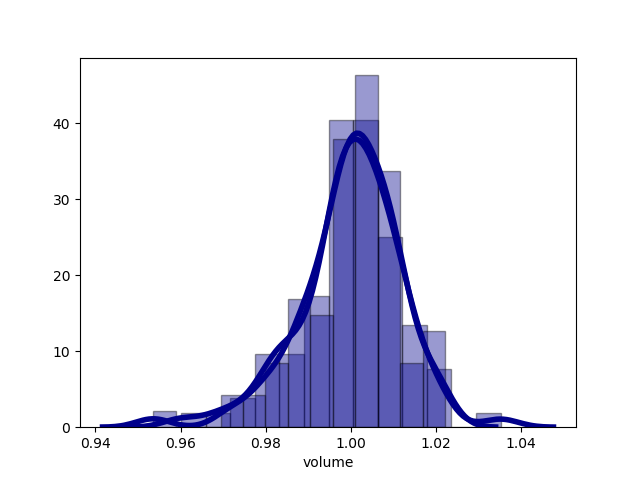

In [30]:
# Exemple
data_K_EFN_O = pd.concat([data_K_E_O,data_K_F_O,data_K_N_O])
res = data_K_EFN_O["volume"]
data_K_EFN_O["volume"] = res/np.mean(res) 
test_gaussien(data_K_EFN_O)

In [32]:
res = data_A_EFN_O["volume"]
data_A_EFN_O["volume"] = res/np.mean(res) 
test_gaussien(data_A_EFN_O)



 TEST Anderson Darling ----------- 
Valeur de la statistique 0.8676747659456936
Valeurs critiques [0.553 0.63  0.756 0.882 1.049]
Niveaux de significativité [15.  10.   5.   2.5  1. ]


 L'hypothèse nulle est celle de la gaussianité ; si la valeur de la statistique est plus grande que la valeur critique correspondant à un niveau de significativité donné, l'hypothèse nulle peut être rejetée
